<a href="https://colab.research.google.com/github/Ishanavi/Concurrency_Control/blob/main/Concurrency_Control_ish.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [47]:
!pip install memory_profiler
from memory_profiler import profile
import os
import psutil
import time
import threading
import concurrent.futures
import queue
from queue import Queue
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import gc

result = []

In [48]:
#mutexes

list_m = []

mutex = threading.Lock()

def mutex_in():
  global list_m
  for i in range(100000):
    with mutex:
      list_m.append([0]*1000)

def mutex_test():
    global list_m
    list_m = []

    #resource monitoring
    process = psutil.Process(os.getpid())

    #warm up
    threads = [threading.Thread(target=mutex_in) for j in range(3)]
    for i in threads:
        i.start()
    for i in threads:
        i.join()
    gc.collect()

    start_time = time.time()
    start_cpu = process.cpu_percent(interval=None)
    start_memory = process.memory_info().rss

    # Running threads
    threads = [threading.Thread(target=mutex_in) for j in range(10)]
    for i in threads:
        i.start()
    for i in threads:
        i.join()

    end_time = time.time()
    end_cpu = process.cpu_percent(interval=None)
    end_memory = process.memory_info().rss

    time_taken = end_time - start_time
    cpu = end_cpu - start_cpu
    memory = max(0,end_memory - start_memory)

    print("Mutex -> Execution time (secondS):", time_taken)
    print("Mutex -> CPU usage (%):", cpu)
    print("Mutex -> Memory usage (bytes):", memory)

    result.append({
        "Mechanism":"Mutex",
        "Execution Time": time_taken,
        "CPU Usage": cpu,
        "Memory Usage": memory
    })

mutex_test()

Mutex -> Execution time (secondS): 35.173428535461426
Mutex -> CPU usage (%): 116.3
Mutex -> Memory usage (bytes): 2397724672


In [49]:
#semaphore
list_s = []

semaphore = threading.Semaphore(1)

def semaphore_in():
  global list_s
  for i in range(100000):
    with semaphore:
      list_s.append([0]*1000)

def semaphore_test():
    global list_s
    list_s = []

    #resource monitoring
    process = psutil.Process(os.getpid())


    threads = [threading.Thread(target=semaphore_in) for j in range(3)]
    for i in threads:
        i.start()
    for i in threads:
        i.join()
    gc.collect()


    start_time = time.time()
    start_cpu = process.cpu_percent(interval=None)
    start_memory = process.memory_info().rss

    # Running threads
    threads = [threading.Thread(target=semaphore_in) for j in range(10)]
    for i in threads:
        i.start()
    for i in threads:
        i.join()

    end_time = time.time()
    end_cpu = process.cpu_percent(interval=None)
    end_memory = process.memory_info().rss

    time_taken = end_time - start_time
    cpu = end_cpu - start_cpu
    memory = max(0,end_memory - start_memory)

    print("Semaphore -> Execution time (seconds):", time_taken)
    print("Semaphore -> CPU usage (%):", cpu)
    print("Semaphore -> Memory usage (bytes):", memory)

    result.append({
      "Mechanism": "Semaphore",
      "Execution Time": time_taken,
      "CPU Usage": cpu,
      "Memory Usage": memory
    })


semaphore_test()

Semaphore -> Execution time (seconds): 18.72115707397461
Semaphore -> CPU usage (%): 103.9
Semaphore -> Memory usage (bytes): 2431496192


In [50]:
#simulating lock free behaviour using concurrent.futures and queues
queue  = Queue()

def queue_in():
  global queue
  for i in range(100000):
    queue.put(0)

def queue_test(function):
    process = psutil.Process(os.getpid())

    threads = [threading.Thread(target=function) for _ in range(3)]
    for i in threads:
        i.start()
    for i in threads:
        i.join()
    gc.collect()


    start_time = time.time()
    start_cpu = process.cpu_percent(interval=None)
    start_memory = process.memory_info().rss

    threads = [threading.Thread(target=function) for _ in range(10)]
    for i in threads:
        i.start()
    for i in threads:
        i.join()

    end_time = time.time()
    end_cpu = process.cpu_percent(interval=None)
    end_memory = process.memory_info().rss

    time_taken = end_time - start_time
    cpu = end_cpu - start_cpu
    memory = max(0,end_memory - start_memory)

    return time_taken,cpu,memory

new_queue = Queue()
queue_time, queue_cpu, queue_memory = queue_test(queue_in)
print("Queue -> Execution time (seconds):", queue_time)
print("Queue -> CPU usage (%):", queue_cpu)
print("Queue -> Memory usage (bytes):", queue_memory)

result.append({
    "Mechanism": "Queue",
    "Execution Time": queue_time,
    "CPU Usage": queue_cpu,
    "Memory Usage": queue_memory
})



Queue -> Execution time (seconds): 12.055040836334229
Queue -> CPU usage (%): 140.7
Queue -> Memory usage (bytes): 4796416


In [51]:
df_result = pd.DataFrame(result)
print(df_result)
sns.set(style="whitegrid")

   Mechanism  Execution Time  CPU Usage  Memory Usage
0      Mutex       35.173429      116.3    2397724672
1  Semaphore       18.721157      103.9    2431496192
2      Queue       12.055041      140.7       4796416


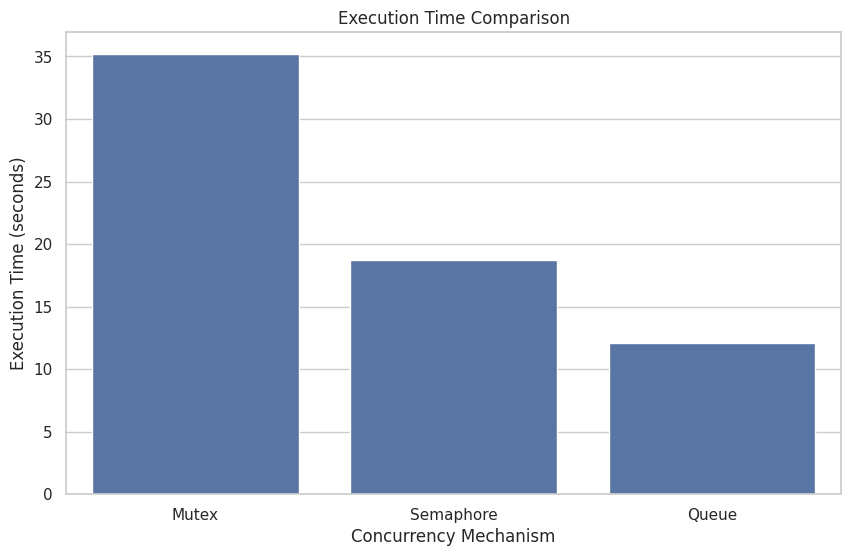

In [52]:
# Plotting Execution Time
plt.figure(figsize=(10, 6))
sns.barplot(x="Mechanism", y="Execution Time", data=df_result)
plt.title("Execution Time Comparison")
plt.xlabel("Concurrency Mechanism")
plt.ylabel("Execution Time (seconds)")
plt.show()

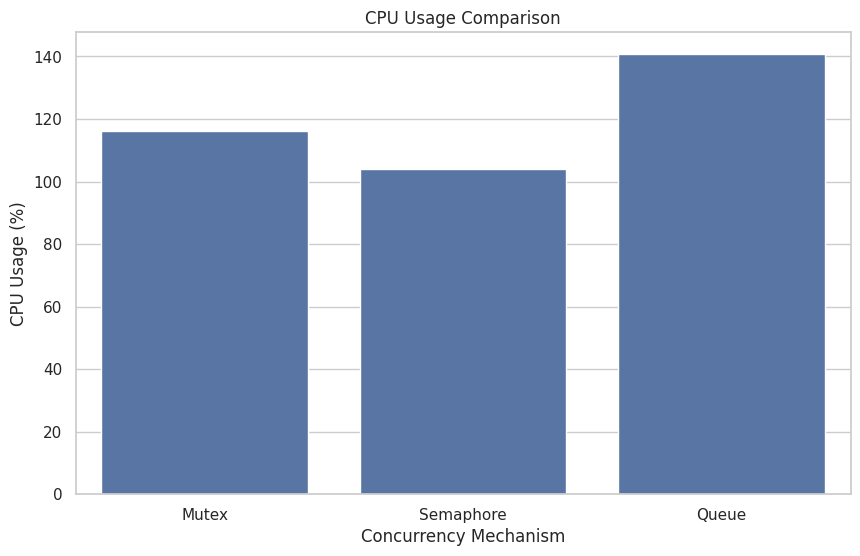

In [53]:
# Plotting CPU Usage
plt.figure(figsize=(10, 6))
sns.barplot(x="Mechanism", y="CPU Usage", data=df_result)
plt.title("CPU Usage Comparison")
plt.xlabel("Concurrency Mechanism")
plt.ylabel("CPU Usage (%)")
plt.show()

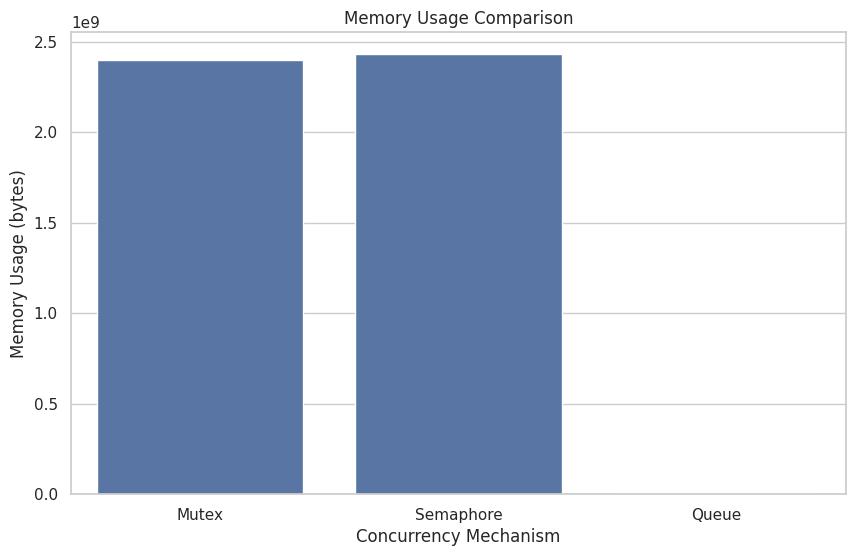

In [54]:
# Plotting Memory Usage
plt.figure(figsize=(10, 6))
sns.barplot(x="Mechanism", y="Memory Usage", data=df_result)
plt.title("Memory Usage Comparison")
plt.xlabel("Concurrency Mechanism")
plt.ylabel("Memory Usage (bytes)")
plt.show()